In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
%matplotlib inline
from readTRC import readTrc

In [14]:
cd /Users/austinmcdonald/Desktop/Compton/NoBarier/zero/

/Users/austinmcdonald/Desktop/Compton/NoBarier/zero


In [15]:
files = os.listdir()
len(files)
files[0::5]

['C4waveform-zero-NO-00019.trc',
 'C4waveform-zero-NO-00018.trc',
 'C4waveform-zero-NO-00023.trc',
 'C4waveform-zero-NO-00020.trc',
 'C4waveform-zero-NO-00046.trc',
 'C4waveform-zero-NO-00041.trc',
 'C4waveform-zero-NO-00038.trc',
 'C4waveform-zero-NO-00039.trc',
 'C4waveform-zero-NO-00002.trc',
 'C4waveform-zero-NO-00001.trc']

In [16]:
area = []
Ttime= []
for q in range(0,len(files)):
    datX, datY, info = readTrc(files[q])
    NTraces     =   info['SUBARRAY_COUNT']
    TotalPoints =   info[ 'WAVE_ARRAY_COUNT']
    dx          =   info['HORIZ_INTERVAL']
    
    a = info["TRIGGER_TIME"].hour *60*60
    b = info["TRIGGER_TIME"].minute *60
    c = info["TRIGGER_TIME"].second *60
    Ttime.append(a+b+c)
    PPT         =   TotalPoints/NTraces
    YTraces     =   np.split(datY, NTraces)
    #XTraces     =   np.split(datX, NTraces)
    for x in range(0,len(YTraces)):
        aa = abs(sum(YTraces[x])*dx)
        area.append(aa)
area = np.array(area)
Ttime = np.array(Ttime)

In [17]:
print(len(area))
print(len(Ttime))

50000
50


In [18]:
qq = Ttime-min(Ttime)
49000/max(qq)

11.835748792270531

In [19]:
#np.savetxt('/Users/austinmcdonald/Desktop/Compton/no-zero-11835.txt',area)

<function matplotlib.pyplot.show>

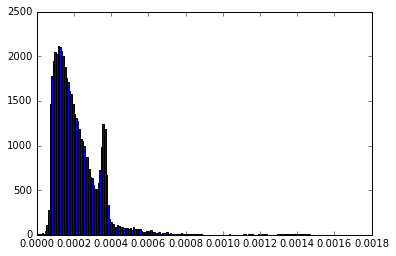

In [22]:
plt.hist(area,bins=200)
plt.show